<hr>
Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)<br>
<img align="left" width="40%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" \><br><br>
<hr>

Read observation stations file from European Climate Assessment & Dataset

https://www.ecad.eu//download/millennium/millennium.php

<pre>
wget https://www.ecad.eu//download/millennium/data/ECA_indexTG.zip
mkdir data
unzip ECA_indexTG.zip -d data
</pre>

File: stations.txt
Error at line 318 because there is an extra comma

<pre>
394  ,KISINEV                                 ,MOLDOVA, REPUBLIC OF                    ,+47:01:12,+028:52:12, 173
</pre>

stations2.txt is the same without this typo error.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re

### Read file

In [11]:
dfStations = pd.read_csv('data/stations2.txt', header=None, skiprows=20)
dfStations.rename(columns={
                   0: "STAID", 
                   1: "STATIONNAME", 
                   2: "COUNTRYNAME", 
                   3: "LAT", 
                   4: "LON", 
                   5: "HGT",
                  }, inplace=True)
dfStations['STATIONNAME'] = dfStations['STATIONNAME'].apply(lambda x: x.strip())
dfStations['COUNTRYNAME'] = dfStations['COUNTRYNAME'].apply(lambda x: x.strip())
dfStations

,STAID,STATIONNAME,COUNTRYNAME,LAT,LON,HGT
0,4,LINKOEPING,SWEDEN,+58:24:00,+015:31:59,93
1,5,LINKOEPING-MALMSLAETT,SWEDEN,+58:24:00,+015:31:59,93
2,6,KARLSTAD,SWEDEN,+59:21:00,+013:28:00,46
3,7,KARLSTAD-AIRPORT,SWEDEN,+59:26:40,+013:20:15,107
4,8,OESTERSUND,SWEDEN,+63:10:59,+014:28:59,376
...,...,...,...,...,...,...
6412,20062,NORDLI - SANDVIKA,NORWAY,+64:27:33,+013:35:52,420
6413,20063,SKARDSBOEFJELLET,NORWAY,+61:13:00,+007:01:05,713
6414,20064,SKISTUA,NORWAY,+63:25:05,+010:15:51,433
6415,20065,AASTA HANSTEEN,NORWAY,+67:16:28,+007:39:15,52


In [12]:
dfStations['COUNTRYNAME'].unique()

array(['SWEDEN', 'AUSTRIA', 'BELGIUM', 'BULGARIA', 'CROATIA', 'CYPRUS',
       'FINLAND', 'FRANCE', 'GERMANY', 'GREECE', 'HUNGARY', 'ICELAND',
       'RUSSIAN FEDERATION', 'DENMARK', 'IRELAND', 'ISRAEL',
       'NETHERLANDS', 'ITALY', 'NORWAY', 'LATVIA', 'LITHUANIA',
       'LUXEMBOURG', 'POLAND', 'PORTUGAL', 'ROMANIA', 'SLOVAKIA',
       'SLOVENIA', 'SPAIN', 'SWITZERLAND', 'TURKEY', 'UKRAINE',
       'UNITED KINGDOM', 'SERBIA', 'ESTONIA', 'REPUBLIC OF MACEDONIA',
       'BOSNIA AND HERZEGOVINA', 'ALBANIA', 'ALGERIA', 'ARMENIA',
       'GREENLAND [DENMARK]', 'EGYPT', 'TURKMENISTAN', 'KAZAKHSTAN',
       'AZERBAIJAN', 'MOLDOVA REPUBLIC OF', 'BELARUS', 'GEORGIA',
       'MOROCCO', 'TUNISIA', 'LIECHTENSTEIN', 'GIBRALTAR', 'UZBEKISTAN',
       'KYRGYZSTAN', 'TAJIKISTAN', 'MONTENEGRO', 'SVALBARD AND JAN MAYEN'],
      dtype=object)

In [13]:
len(dfStations['COUNTRYNAME'].unique())

56

### Convert string to correct positions

In [14]:
# https://stackoverflow.com/questions/50193159/converting-pandas-data-frame-with-degree-minute-second-dms-coordinates-to-deci

def dms2dd(s):
    # example: s = '+007:12:51'
    degrees, minutes, seconds = re.split('[:]+', s)
    #print(degrees, minutes, seconds)
    dd = abs(float(degrees)) + float(minutes)/60 + float(seconds)/(60*60);
    if float(degrees) < 0:
        dd*= -1
    return dd

dms2dd('-007:12:51')

-7.214166666666667

In [15]:
dfStations['LON'] = dfStations['LON'].apply(dms2dd)
dfStations['LAT'] = dfStations['LAT'].apply(dms2dd)

In [16]:
dfStations

,STAID,STATIONNAME,COUNTRYNAME,LAT,LON,HGT
0,4,LINKOEPING,SWEDEN,58.400000,15.533056,93
1,5,LINKOEPING-MALMSLAETT,SWEDEN,58.400000,15.533056,93
2,6,KARLSTAD,SWEDEN,59.350000,13.466667,46
3,7,KARLSTAD-AIRPORT,SWEDEN,59.444444,13.337500,107
4,8,OESTERSUND,SWEDEN,63.183056,14.483056,376
...,...,...,...,...,...,...
6412,20062,NORDLI - SANDVIKA,NORWAY,64.459167,13.597778,420
6413,20063,SKARDSBOEFJELLET,NORWAY,61.216667,7.018056,713
6414,20064,SKISTUA,NORWAY,63.418056,10.264167,433
6415,20065,AASTA HANSTEEN,NORWAY,67.274444,7.654167,52


### Create a map

In [8]:
from ipywidgets import HTML
from ipyleaflet import Map, Marker, Popup, CircleMarker

center = (45, 3)

m = Map(center=center, zoom=5)

for index, row in dfStations.iterrows():
  
    if row['COUNTRYNAME'] in ['FRANCE', 'GERMANY', 'ITALY']: 
        circle_marker = CircleMarker()
        circle_marker.location = (row['LAT'], row['LON'])
        circle_marker.radius = 5
        circle_marker.weight = 0
        circle_marker.fill_opacity = 0.4

        if row['COUNTRYNAME'] == 'FRANCE' :  
            circle_marker.color = "red"
            circle_marker.fill_color = "red"
        elif row['COUNTRYNAME'] == 'GERMANY' :
            circle_marker.color = "blue"
            circle_marker.fill_color = "blue"
        elif row['COUNTRYNAME'] == 'ITALY' :
            circle_marker.color = "green"
            circle_marker.fill_color = "green"     
        m.add_layer(circle_marker)

display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [9]:
from ipywidgets import HTML
from ipyleaflet import Map, Marker, Popup, CircleMarker

center = (45, 3)

m = Map(center=center, zoom=5)

for index, row in dfStations.iterrows():
  
    if row['COUNTRYNAME'] in ['FRANCE']: 
        circle_marker = CircleMarker()
        circle_marker.location = (row['LAT'], row['LON'])
        circle_marker.radius = 5
        circle_marker.weight = 1
        circle_marker.fill_opacity = 0.4
        circle_marker.color = "red"
        circle_marker.fill_color = "red"
        message = HTML()
        message.value = "%s %s %s" %(row['STAID'], row['COUNTRYNAME'], row['STATIONNAME'])       
        circle_marker.popup = message   
        
        m.add_layer(circle_marker)

display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

### Reading a data file

In [17]:
#df1 = pd.read_csv('data/indexTG011322.txt', header=None, delim_whitespace=True, skiprows=30, na_values=['-999999'])
df1 = pd.read_csv('data/indexTG000035.txt', header=None, delim_whitespace=True, skiprows=30, na_values=['-999999'])
df1.rename(columns={
                   0: "SOUID", 
                   1: "YEAR", 
                   2: "ANNUAL", 
                   3: "WINTER HALF YEAR", 
                   4: "SUMMER HALF YEAR", 
                   5: "WINTER (DJF)",
                   6: "SPRING (MAM)",
                   7: "SUMMER (JJA)",
                   8: "AUTUMN (SON)"
                  }, inplace=True)
df1['Date'] =  pd.to_datetime(df1['YEAR'], format='%Y')
df1.set_index('Date', inplace=True)
df1.head()

,SOUID,YEAR,ANNUAL,WINTER HALF YEAR,SUMMER HALF YEAR,WINTER (DJF),SPRING (MAM),SUMMER (JJA),AUTUMN (SON),9,...,11,12,13,14,15,16,17,18,19,20
Date,,,,,,,,,,,,,,,,,,,,,
1893-01-01,35,1893,1283.0,NaN,1889.0,NaN,1433,2121.0,1231,-94,...,1088,1586,1630,2007,2102.0,2249.0,1750,1366,572,362
1894-01-01,35,1894,1180.0,690.0,1645.0,437.0,1154,1886.0,1216,341,...,860,1285,1322,1749,2001.0,1903.0,1603,1212,832,391
1895-01-01,35,1895,1158.0,474.0,1784.0,61.0,1108,1946.0,1427,44,...,585,1194,1549,1887,1987.0,1963.0,2123,1089,1079,598
1896-01-01,35,1896,1111.0,718.0,1641.0,371.0,1162,1920.0,1043,227,...,1014,1028,1438,1880,2087.0,1791.0,1609,1045,475,415
1897-01-01,35,1897,1205.0,675.0,1668.0,496.0,1194,1982.0,1138,282,...,1021,1178,1381,1982,2054.0,1910.0,1492,1111,813,400


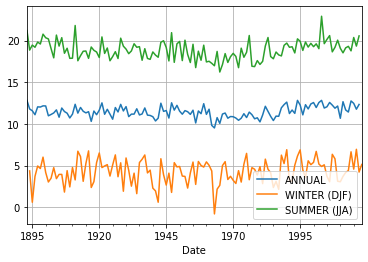

In [18]:
(df1[['ANNUAL', 'WINTER (DJF)', 'SUMMER (JJA)']]/100).plot(grid=True)

In [19]:
print('Date start: %d\nDate end: %d\nSize: %d\nMissing: %d' \
          %(df1['YEAR'].iloc[0], df1['YEAR'].iloc[-1], df1['YEAR'].size, df1['YEAR'].size-df1['ANNUAL'].count()))

Date start: 1893
Date end: 2018
Size: 126
Missing: 1


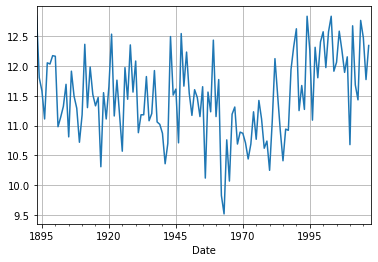

In [20]:
(df1['ANNUAL']/100).plot(grid=True)

In [21]:
print((df1['ANNUAL']/100).mean(), (df1['ANNUAL']/100).max(), (df1['ANNUAL']/100).min())

11.485200000000003 12.83 9.52


In [22]:
df1[ df1['YEAR'] >= 2000]['ANNUAL'].mean()/100.

12.143888888888888

In [23]:
df1[(df1['YEAR'] >= 1980) & (df1['YEAR'] < 2010)]['ANNUAL'].mean()/100

11.823333333333332

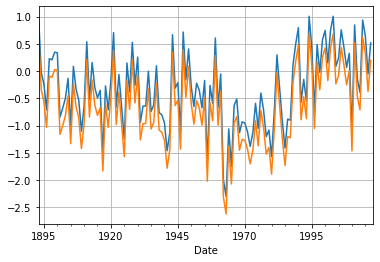

In [24]:
anomalies = (df1['ANNUAL']-df1[(df1['YEAR'] >= 1980) & (df1['YEAR'] < 2010)]['ANNUAL'].mean())/100
anomalies2 = (df1['ANNUAL']-df1[(df1['YEAR'] >= 2000)]['ANNUAL'].mean())/100
anomalies.plot(grid=True)
anomalies2.plot(grid=True)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG

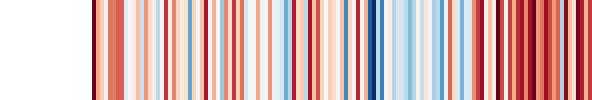

In [26]:
size = 4
height = 100

anomalies = (df1['ANNUAL']-df1[(df1['YEAR'] >= 1980) & (df1['YEAR'] < 2010)]['ANNUAL'].mean())/100
    
norm = mpl.colors.Normalize(vmin=np.nanmin(anomalies),vmax=np.nanmax(anomalies))
    
dateStart = 1870
dateEnd = 2018
    
width = (dateEnd-dateStart)*size
a='<svg width="%d" height="%d" style="border:1px solid lightgray">\n' \
            %(width, height)
for i in range(dateStart, dateEnd):
        
    try: 
        if (not np.isnan(anomalies.loc[str(i)][0])):
                c = plt.cm.RdBu_r(norm(anomalies.loc[str(i)][0]))
        else:
                c = (0,1,0)               # missing 
    except:
        c = (1,1,1)
            
    c = '<rect x="%d" width="%d" height="%d" fill="rgb(%d,%d,%d)"></rect>\n' \
                % ((i-dateStart)*size,size,height,c[0]*255,c[1]*255,c[2]*255)
    a = a + c
    
a = a + '</svg>'

SVG(a)

In [28]:
from cairosvg import svg2png

In [29]:
svg2png(bytestring=a, write_to='output.png')

In [33]:
def read_date(file):
    
    df = pd.read_csv(file, header=None, delim_whitespace=True, skiprows=30, na_values=['-999999'])
    df.rename(columns={
        0: "SOUID", 
        1: "YEAR",
        2: "ANNUAL", 
        3: "WINTER HALF YEAR", 
        4: "SUMMER HALF YEAR", 
        5: "WINTER (DJF)",
        6: "SPRING (MAM)",
        7: "SUMMER (JJA)",
        8: "AUTUMN (SON)"
        }, inplace=True)
    df['Date'] =  pd.to_datetime(df['YEAR'], format='%Y')
    df.set_index('Date', inplace=True)
    
    return df['YEAR'].iloc[0]

In [38]:
def read_data(file, size=2, height=40, verbose=False, displaySVG=True):
    
    s = pd.read_csv(file, skiprows=8, nrows=1)
    countryName = s.iloc[0][0][33:74].strip()
    stationName = s.iloc[0][0][74:115].strip()
    
    df = pd.read_csv(file, header=None, delim_whitespace=True, skiprows=30, na_values=['-999999'])
    df.rename(columns={
        0: "SOUID", 
        1: "YEAR",
        2: "ANNUAL", 
        3: "WINTER HALF YEAR", 
        4: "SUMMER HALF YEAR", 
        5: "WINTER (DJF)",
        6: "SPRING (MAM)",
        7: "SUMMER (JJA)",
        8: "AUTUMN (SON)"
        }, inplace=True)
    df['Date'] =  pd.to_datetime(df['YEAR'], format='%Y')
    df.set_index('Date', inplace=True)
    
    nbGood1 = df[(df['YEAR'] >= 1980) & (df['YEAR'] < 2010)]['YEAR'].count()
    if (nbGood1 != 30):
        return -1
             
    anomalies = (df['ANNUAL']-df[(df['YEAR'] >= 1980) & (df['YEAR'] < 2010)]['ANNUAL'].mean())/100
    
    norm = mpl.colors.Normalize(vmin=np.nanmin(anomalies),vmax=np.nanmax(anomalies))
    
    dateStart = 1870
    dateEnd = 2018
    
    width = (dateEnd-dateStart)*size
    a='<svg width="%d" height="%d" style="border:1px solid lightgray">\n' \
            %(width, height)
    for i in range(dateStart, dateEnd):
        
        try: 
            if (not np.isnan(anomalies.loc[str(i)][0])):
                c = plt.cm.RdBu_r(norm(anomalies.loc[str(i)][0]))
            else:
                c = (0.8,0.8,0.8)               # missing 
        except:
            c = (1,1,1)
            
        c = '<rect x="%d" width="%d" height="%d" fill="rgb(%d,%d,%d)"></rect>\n' \
                % ((i-dateStart)*size,size,height,c[0]*255,c[1]*255,c[2]*255)
        a = a + c
    
    a = a + '</svg>'
    
    if verbose:
        print(countryName, stationName)
        print('Mean: %f' %(df[(df['YEAR'] >= 1980) & (df['YEAR'] < 2010)]['ANNUAL'].mean()/100))
        print('Date start: %d\nDate end: %d\nSize: %d\nMissing: %d' \
          %(df['YEAR'].iloc[0], df['YEAR'].iloc[-1], df['YEAR'].size, df['YEAR'].size-df['ANNUAL'].count()))
        
    STATID = file[-10:-4]
    #print('stripes/' + STATID + '.png')
    svg2png(bytestring=a, write_to=STATID + '.png')

    if displaySVG:
        display(SVG(a))
        return 0
    else:     
        return a

FRANCE BOURGES
Mean: 11.710333
Date start: 1945
Date end: 2018
Size: 74
Missing: 2


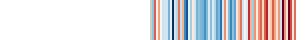

FRANCE LYON - ST EXUPERY
Mean: 12.143667
Date start: 1975
Date end: 2018
Size: 44
Missing: 1


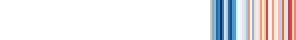

FRANCE TOULOUSE-BLAGNAC
Mean: 13.750667
Date start: 1947
Date end: 2018
Size: 72
Missing: 1


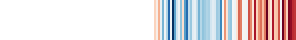

FRANCE CHATEAUROUX DEOLS
Mean: 11.823333
Date start: 1893
Date end: 2018
Size: 126
Missing: 1


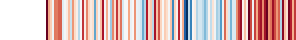

NORWAY DOMBAS II
Mean: 2.188333
Date start: 1900
Date end: 2019
Size: 120
Missing: 3


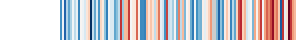

FRANCE BESANCON
Mean: 10.930000
Date start: 1884
Date end: 2018
Size: 135
Missing: 2


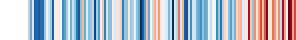

FRANCE AJACCIO
Mean: 15.419667
Date start: 1949
Date end: 2018
Size: 70
Missing: 2


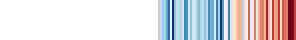

FRANCE L-ILE-D-YEU
Mean: 13.025333
Date start: 1948
Date end: 2018
Size: 71
Missing: 1


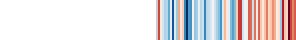

FRANCE PARIS - MONTSOURIS
Mean: 12.405667
Date start: 1873
Date end: 2018
Size: 146
Missing: 0


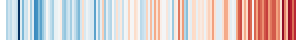

FRANCE MEYTHET
Mean: 10.869444
Date start: 1970
Date end: 2018
Size: 49
Missing: 15


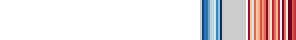

-1

In [39]:
read_data('data/indexTG000032.txt', verbose=True)
read_data('data/indexTG000037.txt', verbose=True)
read_data('data/indexTG000033.txt', verbose=True)
read_data('data/indexTG000035.txt', verbose=True)
read_data('data/indexTG011310.txt', verbose=True)
read_data('data/indexTG019101.txt', verbose=True)
read_data('data/indexTG000747.txt', verbose=True)
read_data('data/indexTG002209.txt', verbose=True)
read_data('data/indexTG000782.txt', verbose=True)
read_data('data/indexTG000038.txt', verbose=True)
read_data('data/indexTG011322.txt', verbose=True)
read_data('data/indexTG011310.txt', verbose=True)

### Create a map with the climate stripes

In [37]:
from ipywidgets import HTML
from ipyleaflet import Map, Marker, Popup, CircleMarker

center = (45, 3)

m = Map(center=center, zoom=5, close_popup_on_click=False)

dfStations['Stripes'] = 0       # will stay to 0 if no error
dfStations['startDate'] = 0
for index, row in dfStations.iterrows():
    #if (index > 40):
    #    break
        
    if row['COUNTRYNAME'] == 'FRANCE' :
        circle_marker = CircleMarker()
        circle_marker.location = (row['LAT'], row['LON'])
        circle_marker.radius = 5
        circle_marker.color = "red"
        circle_marker.weight = 1
        circle_marker.fill_color = "red"
        circle_marker.fill_opacity = 0.4
        
        file = 'data/indexTG0%05d.txt' % row['STAID']
        
        a = read_data(file, displaySVG=False)
        dfStations.loc[index, 'startDate'] = read_date(file)
        
        if (a != -1):
            message = HTML()
            message.value = "%s (%s)" %(row['STATIONNAME'],file)  + a
            circle_marker.popup = message
            m.add_layer(circle_marker)
            
        else:
            dfStations.loc[index, 'Stripes'] = 1

display(m)

1945
1947
1920
1893
1924
1975
1873
1921
1945
1924
1896
1956
1945
1922
1944
1945
1946
1927
1945
1938
1921
1949
1884
1921
1923
1920
1941
1947
1946
1942
1947
1944
1921
1948
1923
1921
1944
1887
1948
1920
1922
1952
1921
1921
1941
1917
1968
1933
1953
1927
1944
1947
1943
1945
1973
1941
1961
1964
1954
1945
1921
1949
1946
1949
1923
1951
1968
1975
1917
1947
1966
1930
1968
1873
1941
1949
1972
1920
1939
1949
1945
1921
1917
1960
1917
1979
1961
1953
1948
1967
1950
1927
1945
1945
1958
1921
1946
1957
1937
1959
1952
1946
1954
1947
1951
1921
1921
1957
1954
1973
1970
1949
1947
1946
1959
1976
1885
1946
1959
1963
1946
1920
1974


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [40]:
a = dfStations[(dfStations['COUNTRYNAME'] == 'FRANCE') & (dfStations['Stripes'] == 0)].copy()
a.drop(columns=['Stripes'], inplace=True)

In [41]:
a.to_json("data.json", orient='values')

In [42]:
len(a)

123

In [43]:
! mv *.png stripes